## Model 
* Logistic Regression
* Decision Tree 
* Bagged Decision Tree
* Random Forest
* XGBoost
* Support Vector machine

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_squared_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import multilabel_confusion_matrix

sns.set_style('whitegrid') # set style for visualization
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/features_engineered.csv', encoding='utf-8')
df

,SUBJECT_ID,SESSION_ID,TRIAL_ID,c_ml_min_r,c_ml_max_r,c_ml_min_l,c_ml_max_l,c_ap_slope_r,c_ap_slope_l,g_ml_max1_r,...,g_v_max1_r,g_v_min_r,g_v_max2_r,g_v_max1_l,g_v_min_l,g_v_max2_l,AGE,BMI,CLASS_LABEL,SPEED
0,510,413,1,0.087271,0.118247,0.087814,0.128115,0.001718,0.002493,0.072643,...,1.035925,0.818121,0.987930,1.083287,0.796622,1.003385,47,35.538442,C,2
1,510,413,2,0.085806,0.128396,0.040212,0.083074,0.001589,0.001834,0.072360,...,1.009803,0.819649,0.991990,1.018526,0.837006,0.999401,47,35.538442,C,2
2,510,413,3,0.073788,0.112735,0.049990,0.099952,0.001740,0.001734,0.059417,...,1.010970,0.823223,0.989883,1.049092,0.815221,1.003578,47,35.538442,C,2
3,510,413,4,0.056216,0.102832,0.086729,0.127982,0.001919,0.001361,0.079792,...,1.047625,0.797822,1.005463,1.118118,0.773203,1.021851,47,35.538442,C,2
4,510,413,6,0.064922,0.102404,0.000573,0.052266,0.001837,0.002049,0.059537,...,1.044787,0.780821,1.009273,1.084354,0.820851,1.027245,47,35.538442,C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70611,93,999910373,7,-0.019602,-0.001001,0.103706,0.140610,0.001320,0.001493,0.035459,...,1.094816,0.766321,1.150030,1.028103,0.776455,1.163370,53,21.651307,HC,2
70612,93,999910373,8,0.053761,0.060738,-0.024844,-0.006204,0.001334,0.002134,0.046960,...,1.164835,0.742256,1.134485,1.077298,0.753378,1.144916,53,21.651307,HC,2
70613,93,999910373,9,0.043214,0.068197,0.038681,0.053585,0.001676,0.001885,0.047020,...,1.174641,0.781061,1.103683,1.037734,0.764046,1.153042,53,21.651307,HC,2
70614,93,999910373,10,0.049181,0.060193,-0.036239,-0.007429,0.002073,0.001640,0.026953,...,1.136903,0.753482,1.167718,1.039462,0.779464,1.158905,53,21.651307,HC,2


In [3]:
df.isna().sum().loc[lambda x : x>0].sort_values(ascending=False)

BMI    26992
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(43624, 29)

In [6]:
df.columns

Index(['SUBJECT_ID', 'SESSION_ID', 'TRIAL_ID', 'c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l', 'AGE', 'BMI', 'CLASS_LABEL', 'SPEED'],
      dtype='object')

<AxesSubplot:xlabel='CLASS_LABEL'>

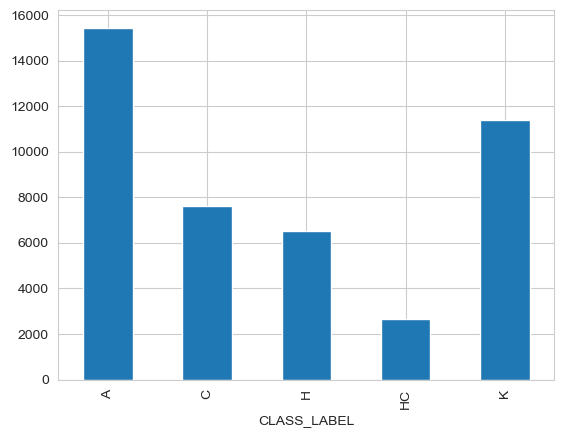

In [7]:
#https://seaborn.pydata.org/generated/seaborn.histplot.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
df.groupby(['CLASS_LABEL']).size().plot.bar()

In [8]:
df.loc[(df.CLASS_LABEL=='HC') , df.columns[3:-3]].mean()

c_ml_min_r       0.027038
c_ml_max_r       0.056654
c_ml_min_l       0.029405
c_ml_max_l       0.054713
c_ap_slope_r     0.001912
c_ap_slope_l     0.001973
g_ml_max1_r      0.044364
g_ml_min_r       0.018531
g_ml_max2_r      0.040479
g_ml_max1_l      0.048012
g_ml_min_l       0.018910
g_ml_max2_l      0.038347
g_ap_min_r      -0.179631
g_ap_max_r       0.218222
g_ap_min_l      -0.178770
g_ap_max_l       0.218492
g_v_max1_r       1.113197
g_v_min_r        0.742862
g_v_max2_r       1.110203
g_v_max1_l       1.107598
g_v_min_l        0.744023
g_v_max2_l       1.110529
AGE             34.713149
dtype: float64

In [9]:
def plot_features(df):
    # Plot
    fig, ax = plt.subplots()
    #HC
    l_hc = mpatches.Patch(color='green', label='HC')
    df.loc[(df.CLASS_LABEL=='HC') , df.columns[3:-3]].mean().plot(color='green')
    #C
    l_c = mpatches.Patch(color='blue', label='C')
    df.loc[(df.CLASS_LABEL=='C') , df.columns[3:-3]].mean().plot(color='blue')
    #A
    l_a = mpatches.Patch(color='orange', label='A')
    df.loc[(df.CLASS_LABEL=='A') , df.columns[3:-3]].mean().plot(color='orange')
    #K
    l_k = mpatches.Patch(color='red', label='K')
    df.loc[(df.CLASS_LABEL=='K') , df.columns[3:-3]].mean().plot(color='red')
    #H
    l_h = mpatches.Patch(color='purple', label='H')
    df.loc[(df.CLASS_LABEL=='H') , df.columns[3:-3]].mean().plot(color='purple')
    
    plt.legend(loc="upper right",handles=[l_hc,l_c,l_a,l_k,l_h])
    plt.title('Participant')
    plt.xlabel('Features')
    plt.locator_params(axis="x", nbins=5)
    plt.ylabel('Data')
    plt.show()

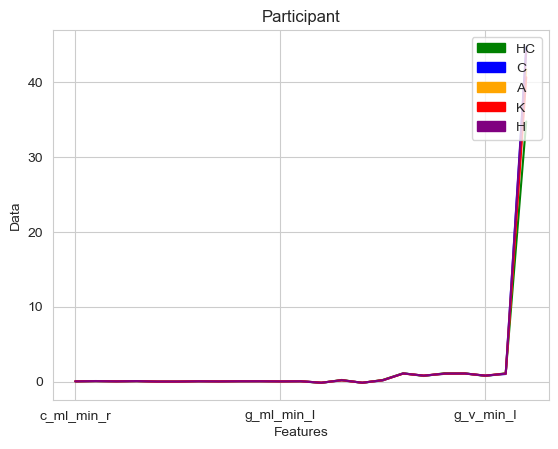

In [10]:
plot_features(df)

### Multi-Class Logistic Regression
* Pipeline
* Params Grid
* Get the best model and score

In [11]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']

X.head()

,c_ml_min_r,c_ml_max_r,c_ml_min_l,c_ml_max_l,c_ap_slope_r,c_ap_slope_l,g_ml_max1_r,g_ml_min_r,g_ml_max2_r,g_ml_max1_l,...,g_ap_min_l,g_ap_max_l,g_v_max1_r,g_v_min_r,g_v_max2_r,g_v_max1_l,g_v_min_l,g_v_max2_l,AGE,BMI
0,0.087271,0.118247,0.087814,0.128115,0.001718,0.002493,0.072643,0.054219,0.092262,0.080701,...,-0.188082,0.130772,1.035925,0.818121,0.987930,1.083287,0.796622,1.003385,47,35.538442
1,0.085806,0.128396,0.040212,0.083074,0.001589,0.001834,0.072360,0.049335,0.076352,0.061662,...,-0.155082,0.136687,1.009803,0.819649,0.991990,1.018526,0.837006,0.999401,47,35.538442
2,0.073788,0.112735,0.049990,0.099952,0.001740,0.001734,0.059417,0.041625,0.072352,0.070566,...,-0.168801,0.143187,1.010970,0.823223,0.989883,1.049092,0.815221,1.003578,47,35.538442
3,0.056216,0.102832,0.086729,0.127982,0.001919,0.001361,0.079792,0.051674,0.084093,0.070156,...,-0.190634,0.155758,1.047625,0.797822,1.005463,1.118118,0.773203,1.021851,47,35.538442
4,0.064922,0.102404,0.000573,0.052266,0.001837,0.002049,0.059537,0.038833,0.070828,0.059307,...,-0.205468,0.140561,1.044787,0.780821,1.009273,1.084354,0.820851,1.027245,47,35.538442


In [12]:
numeric_features = ['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = []
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

lc = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression(solver='lbfgs'))]
)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lc.fit(X_train, y_train)
print("model score: %.3f" % lc.score(X_test, y_test))

model score: 0.509


In [14]:
%%time
param_grid = {
    "classifier__C": [0.1, 1.0, 10, 100],
    "classifier__penalty": ['l2', None],
    "classifier__multi_class": ['ovr', 'multinomial'],
}

gs_lc = GridSearchCV(lc,
                  param_grid,
                  cv=5)

gs_lc.fit(X_train, y_train)

CPU times: total: 1min 11s
Wall time: 1min 12s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['c_ml_min_r',
                                                                          'c_ml_max_r',
                                                                          'c_ml_min_l',
                                                                          'c_ml_max_l',
                                                                          'c_ap_slope_r',
                                                                          'c_ap_slope_l',
                                                                          'g_ml_max1_r',
                                                                          'g_ml_min_r',
                                                                          'g_ml_max2_r',
                                                                          'g_ml_max1_l',
                                                                          'g_ml_min_l',
                                                                          'g_ml_max...
                                                                          'g_ap_max_l',
                                                                          'g_v_max1_r',
                                                                          'g_v_min_r',
                                                                          'g_v_max2_r',
                                                                          'g_v_max1_l',
                                                                          'g_v_min_l',
                                                                          'g_v_max2_l',
                                                                          'AGE',
                                                                          'BMI']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'classifier__multi_class': ['ovr', 'multinomial'],
                         'classifier__penalty': ['l2', None]})

In [15]:
print("Best params:")
print(gs_lc.best_params_)
print(f"Training CV score: {gs_lc.best_score_:.3f}")

Best params:
{'classifier__C': 1.0, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}
Training CV score: 0.503


In [16]:
cv_results = pd.DataFrame(gs_lc.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_classifier__C",
        "param_classifier__penalty",
        "param_classifier__multi_class"
    ]
].head(5)

,mean_test_score,std_test_score,param_classifier__C,param_classifier__penalty,param_classifier__multi_class
6,0.503362,0.002424,1.0,l2,multinomial
2,0.503270,0.002398,0.1,l2,multinomial
14,0.503209,0.002388,100,l2,multinomial
10,0.503179,0.002369,10,l2,multinomial
8,0.496669,0.004333,10,l2,ovr


In [17]:
y_pred = gs_lc.best_estimator_.predict(X_test)
cm = multilabel_confusion_matrix(y_test, y_pred)
cm

array([[[ 4623,  2381],
        [ 1314,  2588]],

       [[ 8498,   534],
        [  993,   881]],

       [[ 8654,   636],
        [ 1090,   526]],

       [[10046,   172],
        [  527,   161]],

       [[ 6452,  1628],
        [ 1427,  1399]]], dtype=int64)

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [19]:
results = pd.DataFrame([], columns = ['Model', 'Parameters', 'Train Score', 'Test Score'])

In [20]:
results = results.append({'Model': 'Logistic Regression', 
                          'Parameters': gs_lc.best_params_,
                          'Train Score': gs_lc.score(X_test,y_test),
                          'Test Score': gs_lc.best_score_
                         }, ignore_index=True)
results

,Model,Parameters,Train Score,Test Score
0,Logistic Regression,"{'classifier__C': 1.0, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}",0.509353,0.503362


## Decision tree

In [21]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']

In [22]:
dt = DecisionTreeClassifier(max_depth = 5,
                            min_samples_split = 2,
                            min_samples_leaf = 2,
                            ccp_alpha = 0.05,
                            random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
dt.fit(X_train, y_train)
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.35420869246286446
Score on testing set: 0.35420869246286446


In [23]:
%%time
gs_dt = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [5,7],
                                  'min_samples_split': [3,5],
                                  'min_samples_leaf': [2,3],
                                  'max_leaf_nodes': [20,30],
                                  'ccp_alpha': [0.003]},
                    cv = 3,
                    verbose = 1)
gs_dt.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
CPU times: total: 46.3 s
Wall time: 47.9 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.003], 'max_depth': [5, 7],
                         'max_leaf_nodes': [20, 30], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5]},
             verbose=1)

In [24]:
gs_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.003, max_depth=5, max_leaf_nodes=20,
                       min_samples_leaf=2, min_samples_split=3)

In [25]:
print(f'Score on training set: {gs_dt.best_estimator_.score(X_train, y_train)}')
print(f'Score on testing set: {gs_dt.best_estimator_.score(X_test, y_test)}')

Score on training set: 0.44214194021639464
Score on testing set: 0.4322391344214194


In [26]:
results = results.append({'Model': 'Decision Tree', 
                          'Parameters': gs_dt.best_params_,
                          'Train Score': gs_dt.best_score_,
                          'Test Score': gs_dt.score(X_test,y_test)
                         }, ignore_index=True)
results

,Model,Parameters,Train Score,Test Score
0,Logistic Regression,"{'classifier__C': 1.0, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}",0.509353,0.503362
1,Decision Tree,"{'ccp_alpha': 0.003, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}",0.439544,0.432239


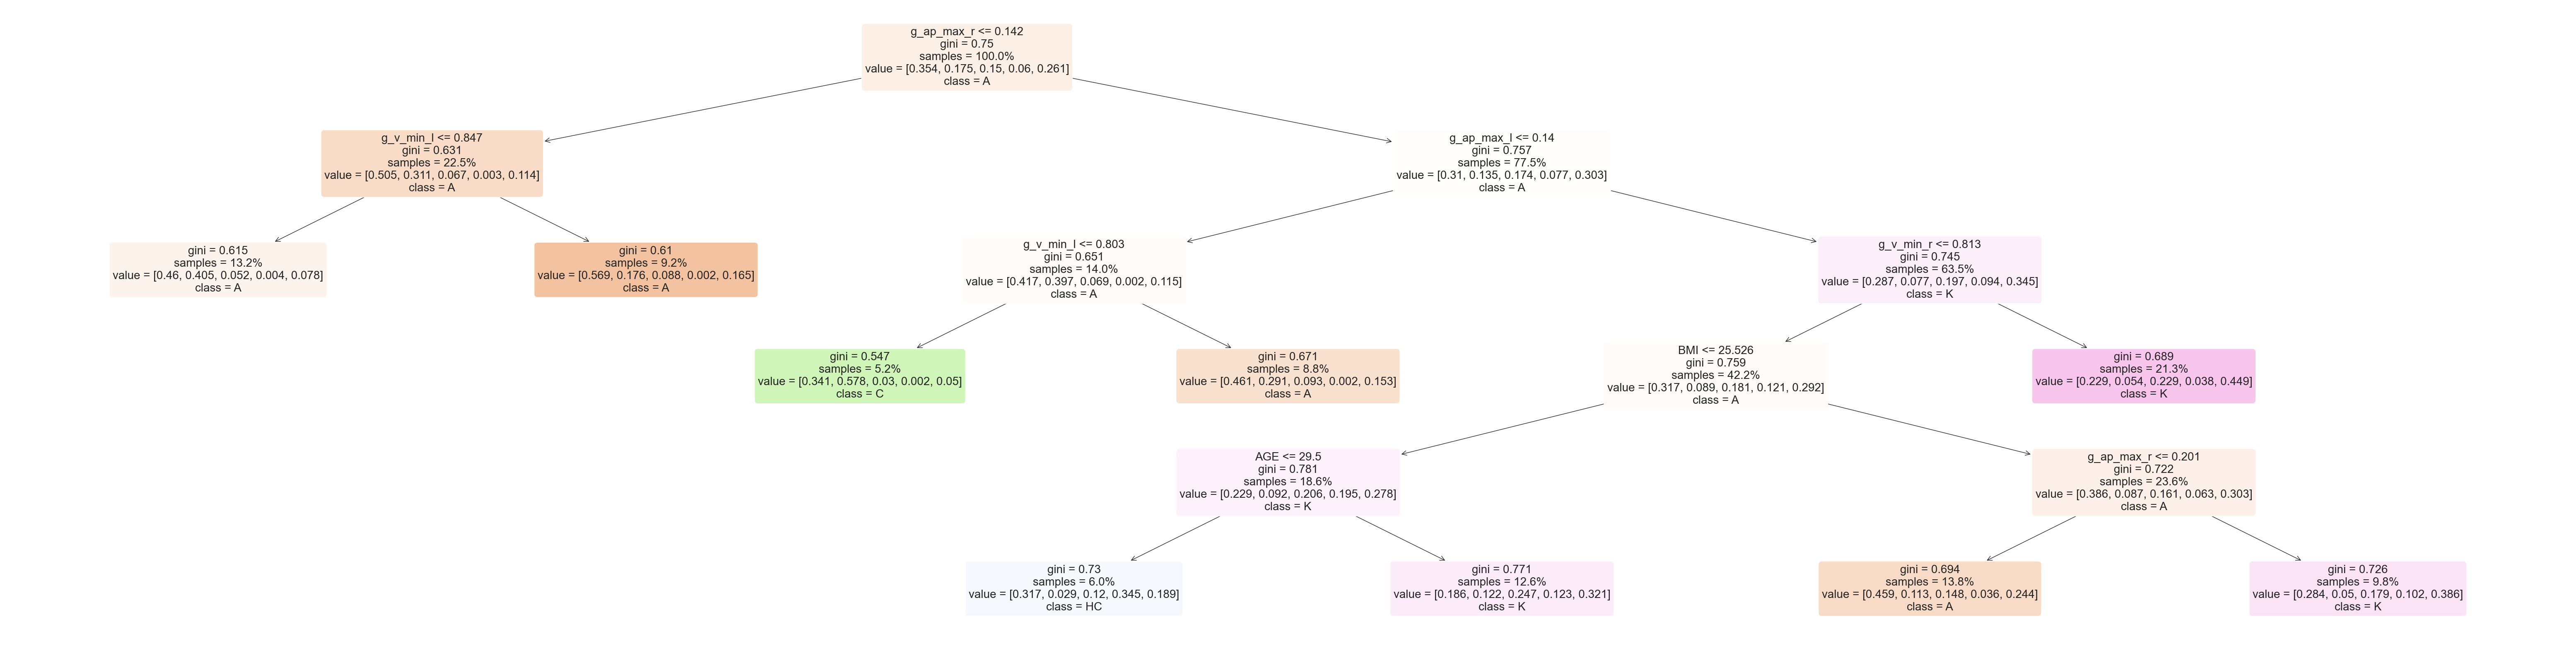

In [27]:
from sklearn.tree import plot_tree

# Establish size of figure.
plt.figure(figsize = (80, 20))

# Plot our tree.
plot_tree(gs_dt.best_estimator_,
          feature_names = X_train.columns,
          class_names = gs_dt.classes_,
          filled = True, 
          fontsize=20,
          proportion = True,
          rounded=True);

In [28]:
# Import export_text from sklearn.tree module.
from sklearn.tree import export_text

# Print out tree in plaintext.
print(export_text(gs_dt.best_estimator_,
                  feature_names=list(X_train.columns)))

|--- g_ap_max_r <= 0.14
|   |--- g_v_min_l <= 0.85
|   |   |--- class: A
|   |--- g_v_min_l >  0.85
|   |   |--- class: A
|--- g_ap_max_r >  0.14
|   |--- g_ap_max_l <= 0.14
|   |   |--- g_v_min_l <= 0.80
|   |   |   |--- class: C
|   |   |--- g_v_min_l >  0.80
|   |   |   |--- class: A
|   |--- g_ap_max_l >  0.14
|   |   |--- g_v_min_r <= 0.81
|   |   |   |--- BMI <= 25.53
|   |   |   |   |--- AGE <= 29.50
|   |   |   |   |   |--- class: HC
|   |   |   |   |--- AGE >  29.50
|   |   |   |   |   |--- class: K
|   |   |   |--- BMI >  25.53
|   |   |   |   |--- g_ap_max_r <= 0.20
|   |   |   |   |   |--- class: A
|   |   |   |   |--- g_ap_max_r >  0.20
|   |   |   |   |   |--- class: K
|   |   |--- g_v_min_r >  0.81
|   |   |   |--- class: K



**Findings**
* Decision tree has 43% accuracy for a 5-class classification  (Random model would have 20% accuracy)
* Lesser accuracy than Logistic regression <br>
* No need to scale our data.
* No assumptions about how  data is distributed
* Easier to interpret than Logistic Regression

### Bagging Trees
* Pipeline
* Params Grid
* Get the best model and score

In [29]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [30]:
%%time
bc = BaggingClassifier(DecisionTreeClassifier(ccp_alpha=0.003, max_depth=5, max_leaf_nodes=15,
                                              min_samples_leaf=2, min_samples_split=3,
                                              random_state=42),
                              n_estimators=100,
                              bootstrap=True,
                              random_state=42)
bc.fit(X_train, y_train)
print(f'Score on training set: {bc.score(X_train, y_train)}')
print(f'Score on testing set: {bc.score(X_test, y_test)}')

Score on training set: 0.4620698086680115
Score on testing set: 0.45598752980011004
CPU times: total: 1min 17s
Wall time: 1min 18s


In [31]:
bc.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.003, max_depth=5, max_leaf_nodes=15,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=1952926171)

In [32]:
# Print out tree in plaintext.
print(export_text(bc.estimators_[1],
                  feature_names=list(X_train.columns)))

|--- g_ap_max_l <= 0.14
|   |--- g_v_min_l <= 0.80
|   |   |--- class: 1
|   |--- g_v_min_l >  0.80
|   |   |--- BMI <= 30.28
|   |   |   |--- class: 0
|   |   |--- BMI >  30.28
|   |   |   |--- class: 0
|--- g_ap_max_l >  0.14
|   |--- g_ap_max_r <= 0.13
|   |   |--- g_v_max1_l <= 1.11
|   |   |   |--- class: 0
|   |   |--- g_v_max1_l >  1.11
|   |   |   |--- class: 1
|   |--- g_ap_max_r >  0.13
|   |   |--- g_v_min_r <= 0.81
|   |   |   |--- g_v_max2_r <= 1.06
|   |   |   |   |--- AGE <= 50.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AGE >  50.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- g_v_max2_r >  1.06
|   |   |   |   |--- g_ap_max_l <= 0.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- g_ap_max_l >  0.19
|   |   |   |   |   |--- class: 4
|   |   |--- g_v_min_r >  0.81
|   |   |   |--- class: 4



In [33]:
%%time
param_grid = {
    'base_estimator__max_depth' : [5,7],
    'base_estimator__max_leaf_nodes' : [20,30],
    'base_estimator__ccp_alpha': [0.003],
    'max_samples' : [0.3, 0.5],
    'n_estimators': [100],
    'base_estimator__min_samples_leaf':[2], 
    'base_estimator__min_samples_split':[3],
}

gs_bc = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=42)), param_grid)
gs_bc.fit(X_train, y_train)
print(f'Score on training set: {gs_bc.score(X_train, y_train)}')
print(f'Score on testing set: {gs_bc.score(X_test, y_test)}'),

Score on training set: 0.47939971880921817
Score on testing set: 0.4755180634513112
CPU times: total: 22min 40s
Wall time: 25min 59s


(None,)

In [34]:
gs_bc.best_params_

{'base_estimator__ccp_alpha': 0.003,
 'base_estimator__max_depth': 7,
 'base_estimator__max_leaf_nodes': 30,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 3,
 'max_samples': 0.3,
 'n_estimators': 100}

In [35]:
gs_bc.best_estimator_.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.003, max_depth=7, max_leaf_nodes=30,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=629983178)

In [36]:
results = results.append({'Model': 'Bagging Classifier (Decision tree)', 
                          'Parameters': gs_bc.best_params_,
                          'Train Score': gs_bc.best_score_,
                          'Test Score': gs_bc.best_estimator_.score(X_test,y_test)
                         }, ignore_index=True)
results

,Model,Parameters,Train Score,Test Score
0,Logistic Regression,"{'classifier__C': 1.0, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}",0.509353,0.503362
1,Decision Tree,"{'ccp_alpha': 0.003, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}",0.439544,0.432239
2,Bagging Classifier (Decision tree),"{'base_estimator__ccp_alpha': 0.003, 'base_estimator__max_depth': 7, 'base_estimator__max_leaf_nodes': 30, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 100}",0.478788,0.475518


In [37]:
# First tree in text format
print(export_text(gs_bc.best_estimator_.estimators_[0],
                  feature_names=list(X_train.columns)))

|--- g_ap_max_r <= 0.13
|   |--- g_v_min_l <= 0.87
|   |   |--- class: 0
|   |--- g_v_min_l >  0.87
|   |   |--- class: 0
|--- g_ap_max_r >  0.13
|   |--- g_ap_max_l <= 0.14
|   |   |--- g_v_max2_l <= 1.00
|   |   |   |--- c_ap_slope_l <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- c_ap_slope_l >  0.00
|   |   |   |   |--- class: 0
|   |   |--- g_v_max2_l >  1.00
|   |   |   |--- class: 0
|   |--- g_ap_max_l >  0.14
|   |   |--- g_v_min_r <= 0.80
|   |   |   |--- g_v_max2_r <= 1.05
|   |   |   |   |--- AGE <= 50.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AGE >  50.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- g_v_max2_r >  1.05
|   |   |   |   |--- g_ap_max_l <= 0.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- g_ap_max_l >  0.19
|   |   |   |   |   |--- class: 4
|   |   |--- g_v_min_r >  0.80
|   |   |   |--- BMI <= 29.92
|   |   |   |   |--- class: 4
|   |   |   |--- BMI >  29.92
|   |   |   |   |--- class: 4



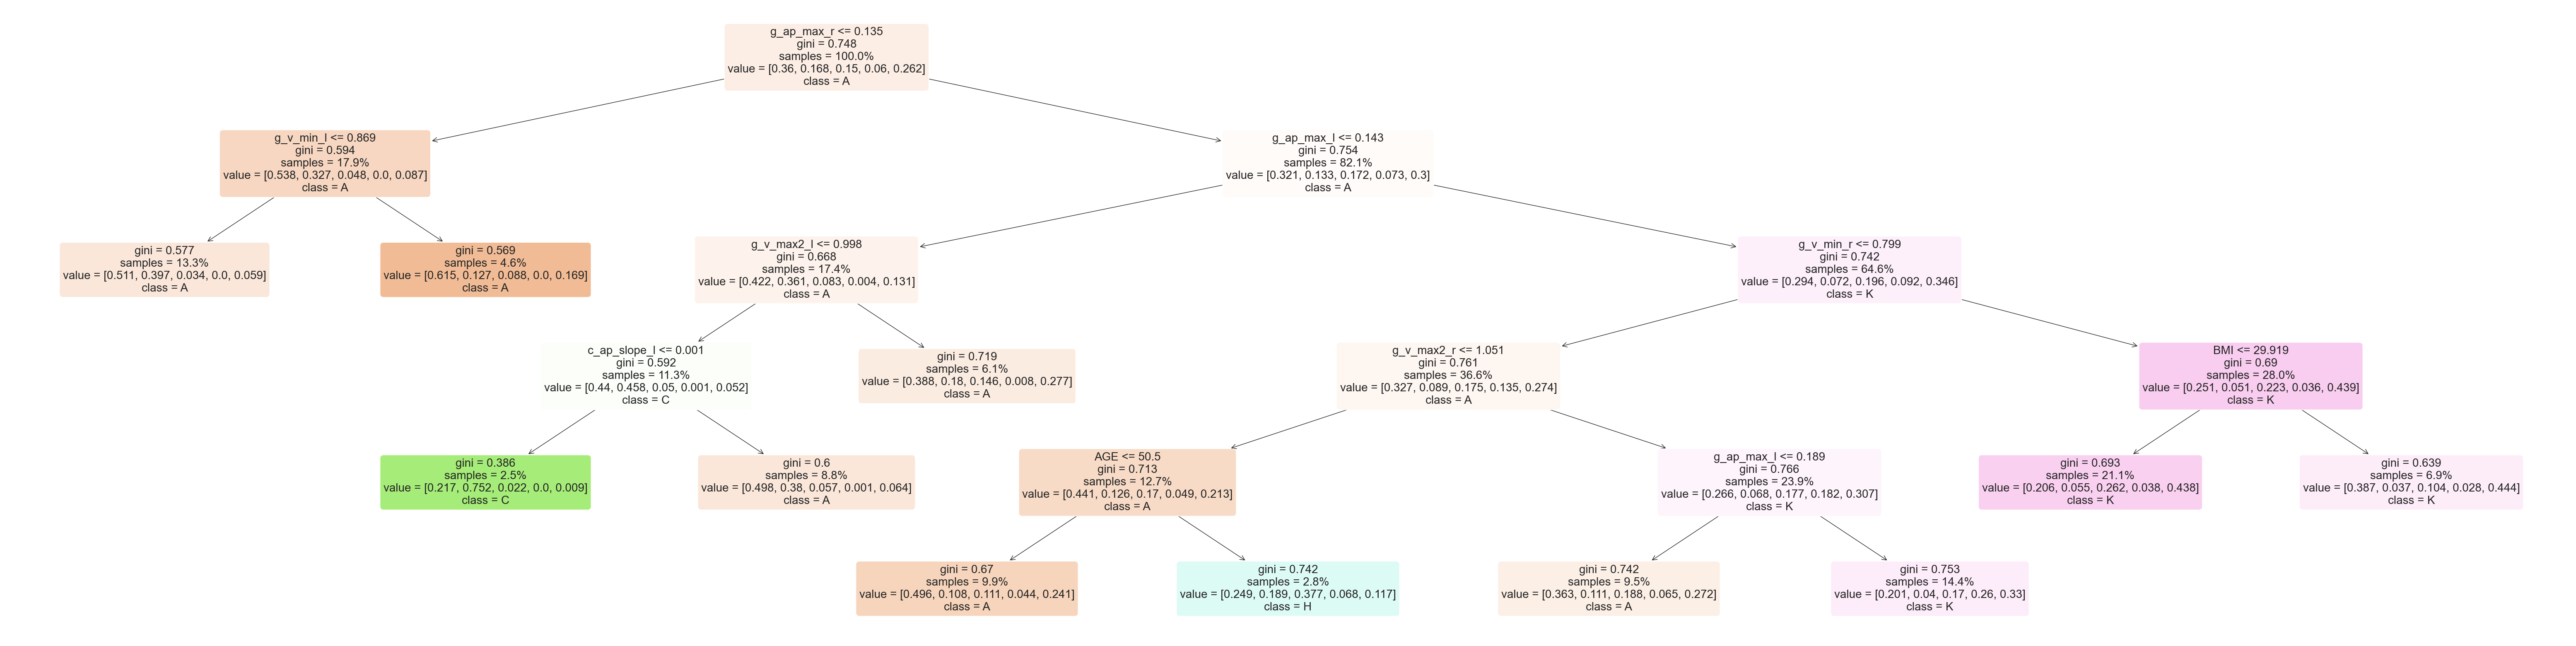

In [38]:
# First Tree in the bagged classifier
plt.figure(figsize = (80, 20))
plot_tree(gs_bc.best_estimator_.estimators_[0],
          feature_names = X_train.columns,
          class_names = bc.classes_,
          filled = True, 
          fontsize=20,
          proportion = True,
          rounded=True);

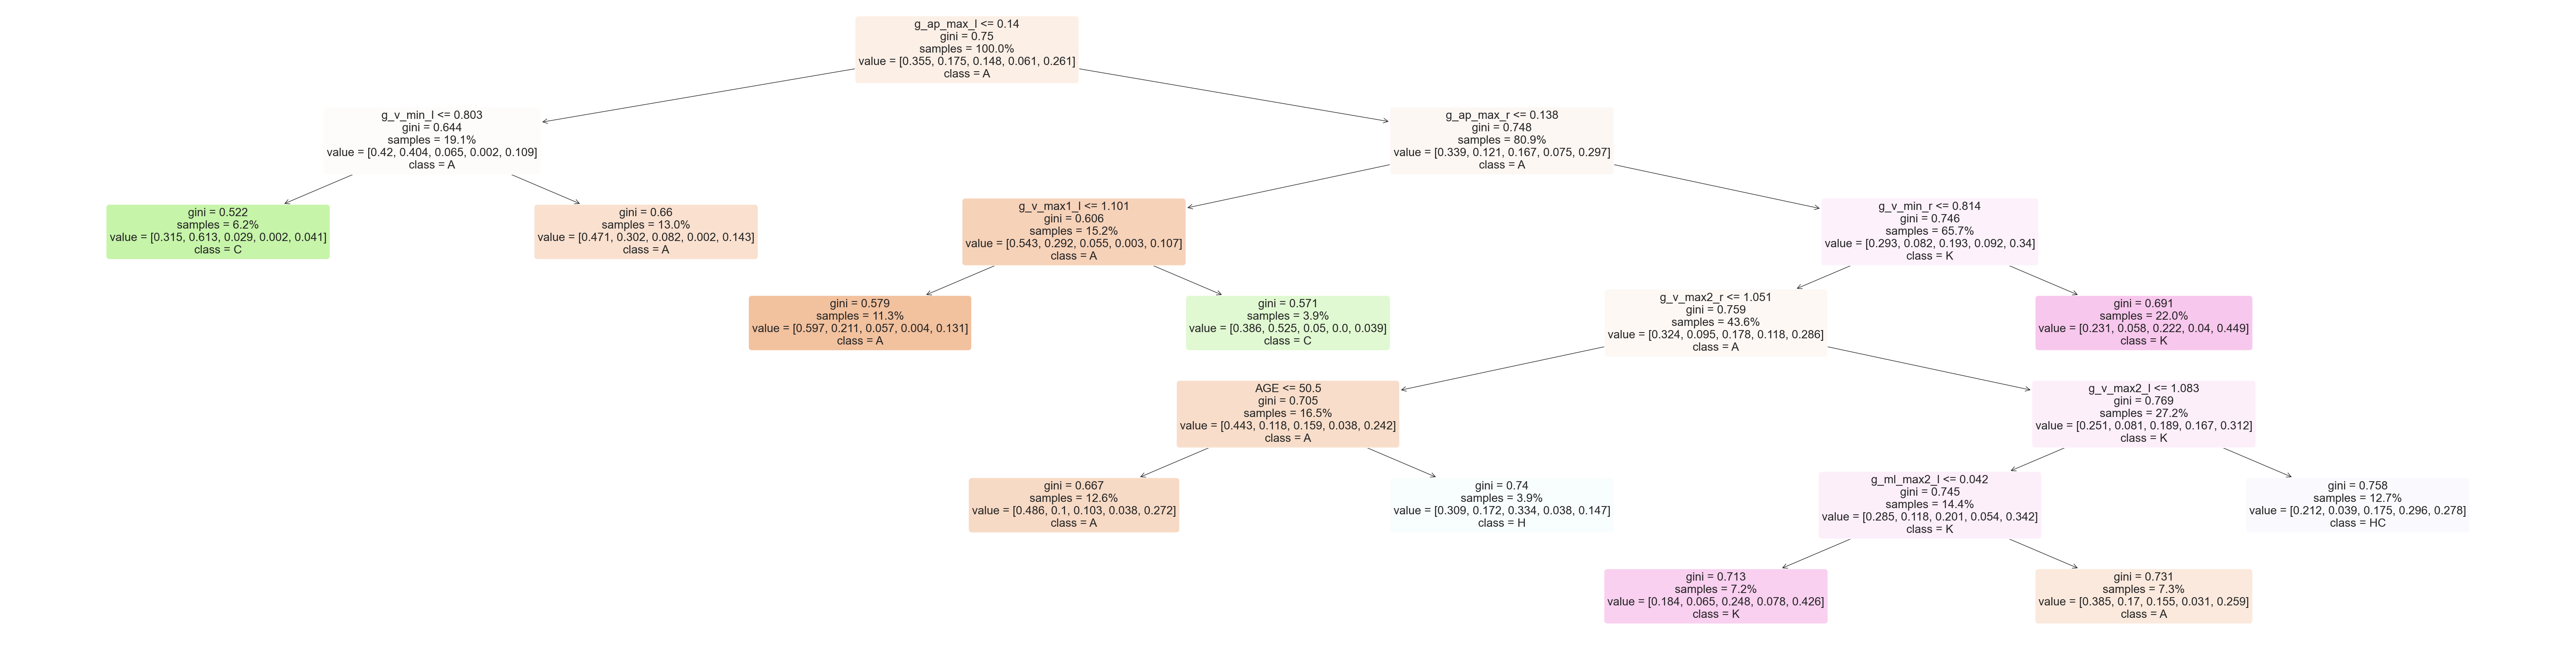

In [39]:
# Plot second tree in the bag classifier
plt.figure(figsize = (80, 20))
plot_tree(gs_bc.best_estimator_.estimators_[1],
              feature_names = X_train.columns,
              class_names = bc.classes_,
              filled = True, 
              fontsize=20,
              proportion = True,
              rounded=True);

### Random Forests

In [40]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [41]:
%%time
rf = RandomForestClassifier(n_estimators=100,
                            ccp_alpha=0.003, 
                            max_depth=7, 
                            max_leaf_nodes=30,
                            min_samples_leaf=2, 
                            min_samples_split=3,
                            random_state=42)
cross_val_score(rf, X_train, y_train, cv=5).mean()

CPU times: total: 1min 2s
Wall time: 1min 13s


0.4410108537203761

In [42]:
%%time
rf_params = {
    'n_estimators': [100],
    'ccp_alpha': [0.003],
    'max_depth':[5,7],
    'max_leaf_nodes':[20,30]
}
gs_rf = GridSearchCV(rf, param_grid=rf_params, cv=3)
gs_rf.fit(X_train, y_train)

print(f'Score on training set: {gs_rf.best_estimator_.score(X_train, y_train)}')
print(f'Score on testing set: {gs_rf.best_estimator_.score(X_test, y_test)}')

Score on training set: 0.44091937159973105
Score on testing set: 0.4384742343664038
CPU times: total: 1min 59s
Wall time: 2min 36s


In [43]:
gs_rf.best_params_

{'ccp_alpha': 0.003, 'max_depth': 7, 'max_leaf_nodes': 30, 'n_estimators': 100}

In [44]:
gs_rf.best_estimator_.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.003, max_depth=7, max_features='sqrt',
                       max_leaf_nodes=30, min_samples_leaf=2,
                       min_samples_split=3, random_state=1608637542)

In [45]:
# First tree in text format
print(export_text(gs_rf.best_estimator_.estimators_[0],
                  feature_names=list(X_train.columns)))

|--- g_v_max2_l <= 0.99
|   |--- g_ap_max_l <= 0.14
|   |   |--- g_v_min_l <= 0.80
|   |   |   |--- class: 1.0
|   |   |--- g_v_min_l >  0.80
|   |   |   |--- class: 0.0
|   |--- g_ap_max_l >  0.14
|   |   |--- class: 0.0
|--- g_v_max2_l >  0.99
|   |--- g_ap_max_r <= 0.14
|   |   |--- g_v_max1_l <= 1.11
|   |   |   |--- class: 0.0
|   |   |--- g_v_max1_l >  1.11
|   |   |   |--- class: 1.0
|   |--- g_ap_max_r >  0.14
|   |   |--- g_ap_max_l <= 0.13
|   |   |   |--- class: 0.0
|   |   |--- g_ap_max_l >  0.13
|   |   |   |--- g_v_max1_l <= 1.06
|   |   |   |   |--- class: 4.0
|   |   |   |--- g_v_max1_l >  1.06
|   |   |   |   |--- g_v_max1_r <= 1.08
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- g_v_max1_r >  1.08
|   |   |   |   |   |--- BMI <= 25.48
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- BMI >  25.48
|   |   |   |   |   |   |--- class: 0.0



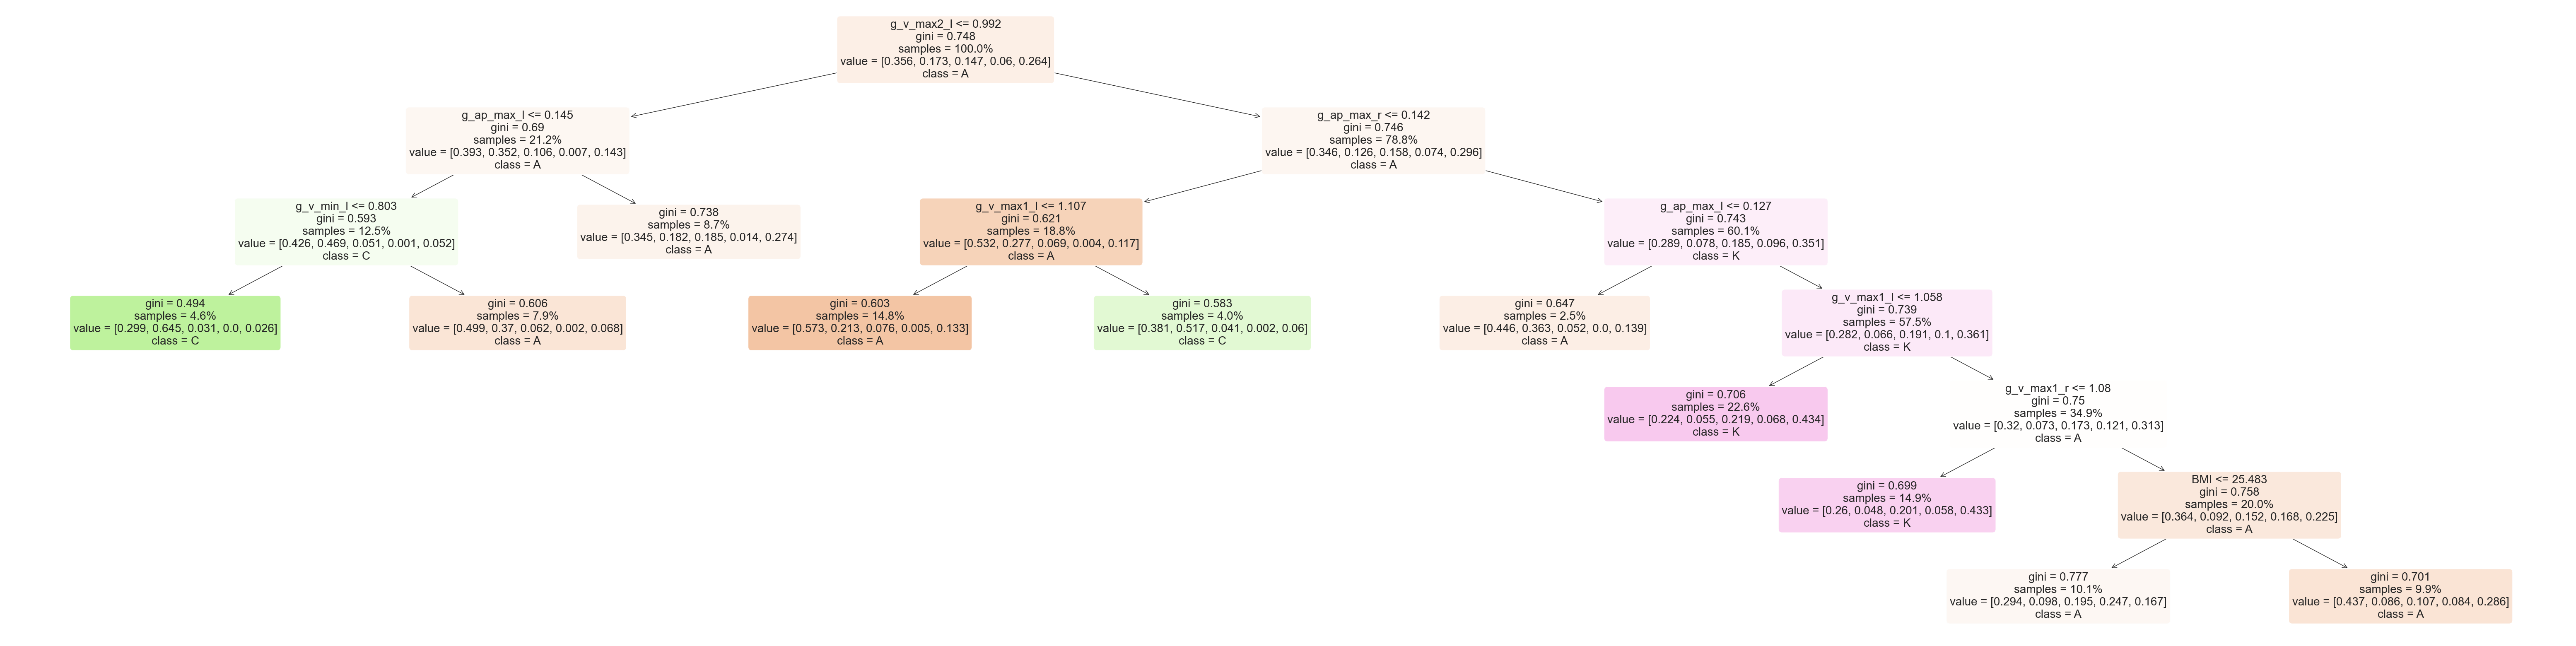

In [46]:
# Plot first tree in the bag classifier
plt.figure(figsize = (80, 20))
plot_tree(gs_rf.best_estimator_.estimators_[0],
              feature_names = X_train.columns,
              class_names = bc.classes_,
              filled = True, 
              fontsize=20,
              proportion = True,
              rounded=True);

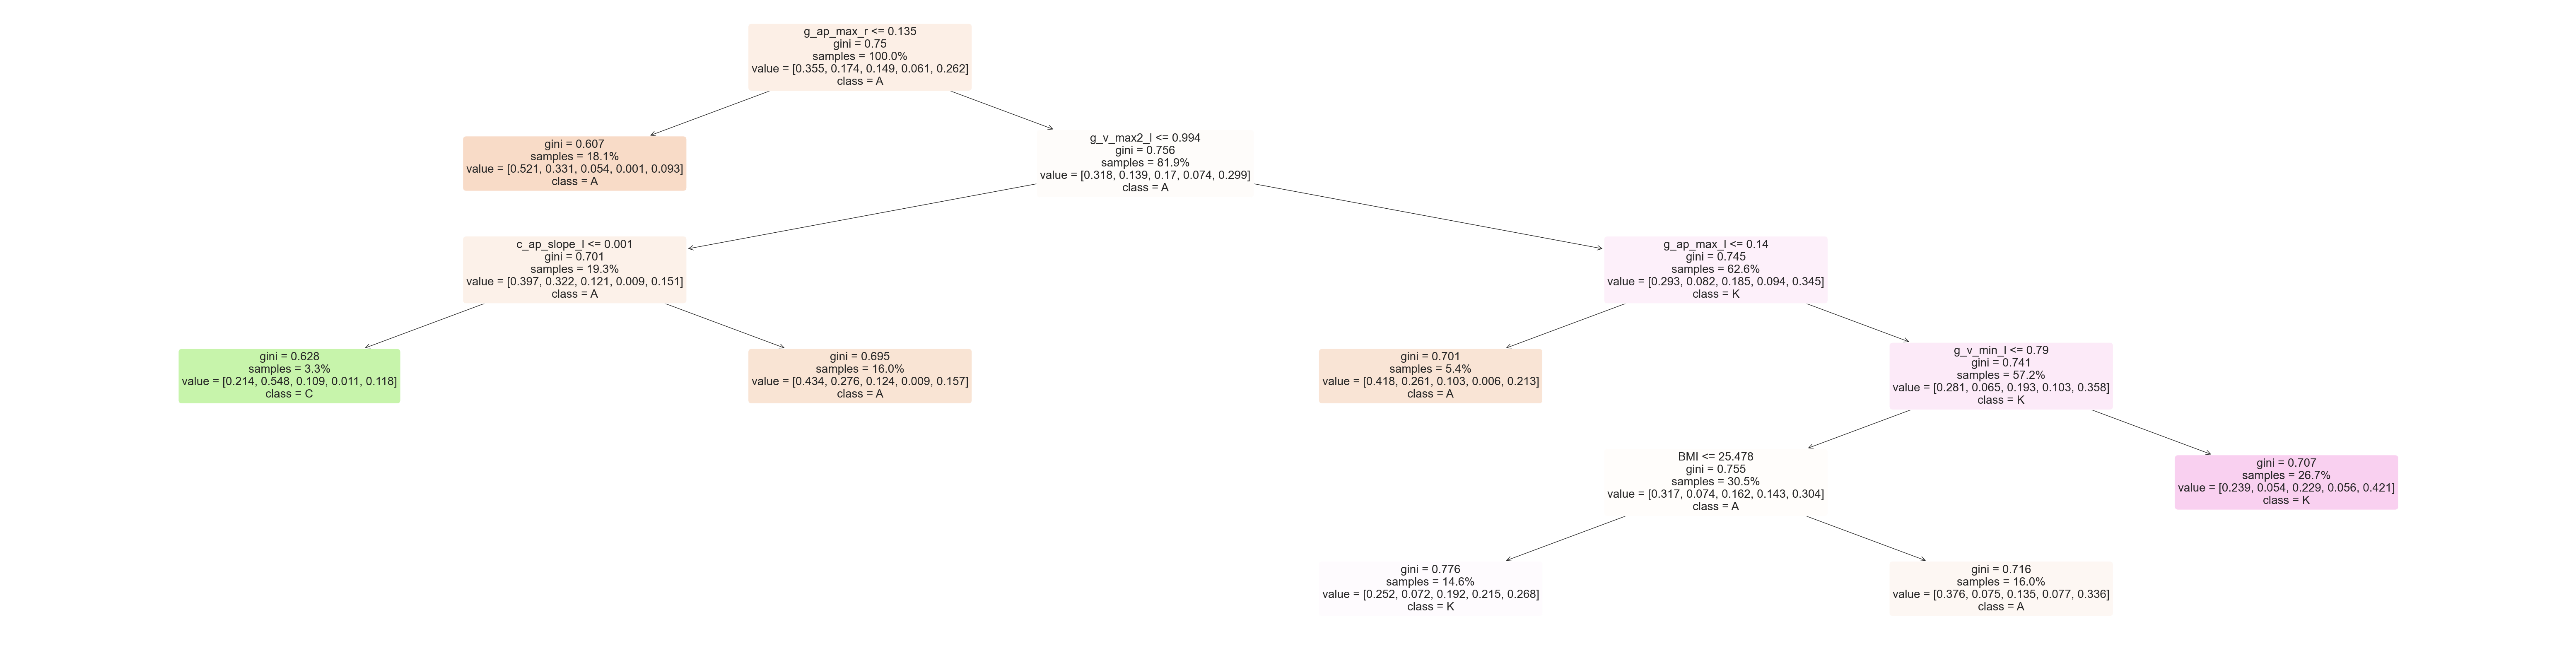

In [47]:
# Plot 100th tree in the bag classifier
plt.figure(figsize = (80, 20))
plot_tree(gs_rf.best_estimator_.estimators_[99],
              feature_names = X_train.columns,
              class_names = bc.classes_,
              filled = True, 
              fontsize=20,
              proportion = True,
              rounded=True);

In [48]:
print(f"{gs_rf.best_estimator_}")

RandomForestClassifier(ccp_alpha=0.003, max_depth=7, max_leaf_nodes=30,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=42)


In [49]:
results = results.append({'Model': 'Random Forest', 
                          'Parameters': gs_rf.best_estimator_[0],
                          'Train Score': gs_rf.best_score_,
                          'Test Score': gs_rf.best_estimator_.score(X_test,y_test)
                         }, ignore_index=True)
results

,Model,Parameters,Train Score,Test Score
0,Logistic Regression,"{'classifier__C': 1.0, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}",0.509353,0.503362
1,Decision Tree,"{'ccp_alpha': 0.003, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}",0.439544,0.432239
2,Bagging Classifier (Decision tree),"{'base_estimator__ccp_alpha': 0.003, 'base_estimator__max_depth': 7, 'base_estimator__max_leaf_nodes': 30, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 100}",0.478788,0.475518
3,Random Forest,"DecisionTreeClassifier(ccp_alpha=0.003, max_depth=7, max_features='sqrt',\n max_leaf_nodes=30, min_samples_leaf=2,\n min_samples_split=3, random_state=1608637542)",0.441592,0.438474


## Gradient Boosting

In [50]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [51]:
%%time
gboost = GradientBoostingClassifier()
gboost_params = {
    'max_depth': [7],
    'n_estimators': [100],
    'learning_rate': [.1]
}
gs_gboost = GridSearchCV(gboost, param_grid=gboost_params)
gs_gboost.fit(X_train, y_train)

print(f'Score on training set: {gs_gboost.best_estimator_.score(X_train, y_train)}')
print(f'Score on testing set: {gs_gboost.best_estimator_.score(X_test, y_test)}')
print(gs_gboost.best_params_)

Score on training set: 0.9725227703404854
Score on testing set: 0.8605354850540987
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
CPU times: total: 59min 11s
Wall time: 1h 2min 39s


In [52]:
gs_gboost.best_estimator_.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1CC39AE2340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1CC39AE2340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1CC39AE2340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1CC39AE2340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1CC39AE2340)],
      dtype=object)

In [53]:
gs_gboost.best_estimator_.estimators_[0][1]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      random_state=RandomState(MT19937) at 0x1CC39AE2340)

In [54]:
gs_gboost.best_score_

0.8483401604656351

In [55]:
results = results.append({'Model': 'Gradient Boost', 
                          'Parameters': gs_gboost.best_estimator_.estimators_[0][1],
                          'Train Score': gs_gboost.best_score_,
                          'Test Score': gs_gboost.best_estimator_.score(X_test,y_test)
                         }, ignore_index=True)
results

,Model,Parameters,Train Score,Test Score
0,Logistic Regression,"{'classifier__C': 1.0, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}",0.509353,0.503362
1,Decision Tree,"{'ccp_alpha': 0.003, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}",0.439544,0.432239
2,Bagging Classifier (Decision tree),"{'base_estimator__ccp_alpha': 0.003, 'base_estimator__max_depth': 7, 'base_estimator__max_leaf_nodes': 30, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 100}",0.478788,0.475518
3,Random Forest,"DecisionTreeClassifier(ccp_alpha=0.003, max_depth=7, max_features='sqrt',\n max_leaf_nodes=30, min_samples_leaf=2,\n min_samples_split=3, random_state=1608637542)",0.441592,0.438474
4,Gradient Boost,"DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,\n random_state=RandomState(MT19937) at 0x1CC39AE2340)",0.848340,0.860535
